In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
company = pd.read_csv("D:\\Assignment\\14. Assignment_14_Decision_Tree\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [6]:
company.Sales.value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [7]:
#company['sales_'] = company['Sales'].apply(lambda x: "Low" if x<= 7 else "High") 
#company.head()

# lets convert sales veriable  into categorical

In [8]:
company['sales_1'] = company['Sales'].apply(lambda x: "Low" if x<=6 else("Medium" if 6<x<10 else "High")) 
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
company['sales_1'].value_counts()

Medium    191
Low       130
High       79
Name: sales_1, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_1', ylabel='count'>

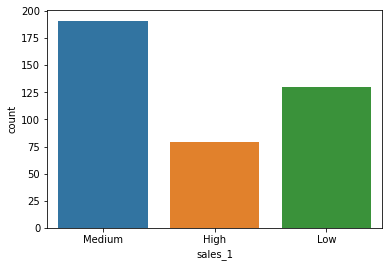

In [10]:
# Visualization
import seaborn as sns

#Countplot
sns.countplot(company['sales_1'])

In [11]:
# Unique values
company.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [12]:
# counts unique value
company.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

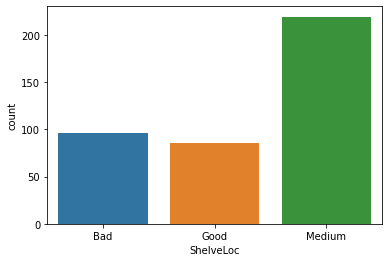

In [13]:
sns.countplot(company['ShelveLoc'])

In [14]:
company.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

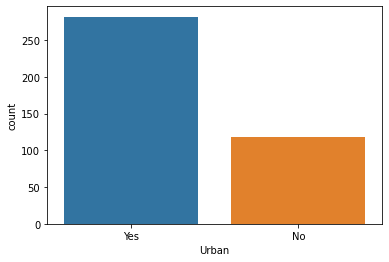

In [16]:
sns.countplot(company['Urban'])

In [17]:
company.US.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
company.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

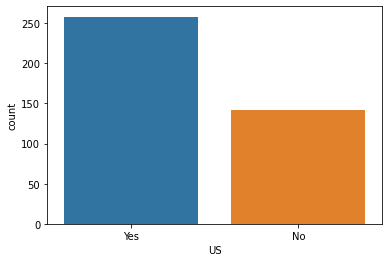

In [19]:
sns.countplot(company['US'])

In [20]:
company.sales_1.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [21]:
company.sales_1.value_counts()

Medium    191
Low       130
High       79
Name: sales_1, dtype: int64

In [22]:
company_ =company.drop('Sales' ,axis =1)

In [23]:
company_.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_1
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Label Encoding

In [24]:
from sklearn import preprocessing

In [25]:
label_enc = preprocessing.LabelEncoder()

In [26]:
company_['ShelveLoc'] = label_enc.fit_transform(company_['ShelveLoc'])

In [27]:
company_['Urban'] = label_enc.fit_transform(company_['Urban'])

In [28]:
company_['US']= label_enc.fit_transform(company_['US'])
company_['sales_1'] = label_enc.fit_transform(company_['sales_1'])

In [29]:
company_.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_1
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


# Feature selection
# univariate

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
array =company_.values

X1 = array[:,0:10]
Y1 = array[:,-1]

In [75]:
X1

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [76]:

Y1

array([2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2,

In [32]:
# Feature extraction
test = SelectKBest(score_func = chi2)
fit = test.fit(X1,Y1)

In [33]:
from numpy import set_printoptions

In [34]:
# summarized scores

set_printoptions(precision=3)
score = fit.scores_

In [35]:
score

array([1.313e+00, 1.113e+02, 1.818e+02, 7.109e+01, 3.061e+02, 1.019e+01,
       8.175e+01, 5.770e-01, 6.193e-03, 5.358e+00])

In [79]:
score_1 = pd.DataFrame(score ,columns =['score']).sort_values(by='score', ascending= True)

In [80]:
score_1

,score
8,0.006193
7,0.577030
0,1.312881
9,5.358125
5,10.185061
3,71.093158
6,81.751651
1,111.314137
2,181.779348
4,306.075593


In [38]:
# index 8 has low chi2 value


In [39]:
company_new_1 = company_.drop(['Urban'] , axis = 1)

In [40]:
company_new_1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,sales_1
0,138,73,11,276,120,0,42,17,1,2
1,111,48,16,260,83,1,65,10,1,0
2,113,35,10,269,80,2,59,12,1,0
3,117,100,4,466,97,2,55,14,1,2
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,0
396,139,23,3,37,120,2,55,11,1,2
397,162,26,12,368,159,2,40,18,1,2
398,100,79,7,284,95,0,50,12,1,1


In [41]:
company2 =company_new_1.drop(['ShelveLoc','US','sales_1'] , axis = 1)

In [42]:
company2.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13


In [43]:
company3 = pd.DataFrame(company_[['ShelveLoc','US','sales_1']])

In [44]:
company3

,ShelveLoc,US,sales_1
0,0,1,2
1,1,1,0
2,2,1,0
3,2,1,2
4,0,0,1
...,...,...,...
395,1,1,0
396,2,1,2
397,2,1,2
398,0,1,1


In [45]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [46]:
company_norm = norm_func(company2)

In [47]:
company_norm

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375
...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250


In [48]:
# Data Joining

In [49]:
company_norm_1 = company_norm.join(company3)

In [50]:
company_norm_1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,US,sales_1
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0,1,2
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1,1,0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,2,1,0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,2,1,2
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1,1,0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,2,1,2
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,2,1,2
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0,1,1


In [51]:
x = company_norm_1.iloc[:,0:9]
y = company_norm_1.iloc[:,-1]

In [52]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,2,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,2,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0,0
...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1,1
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,2,1
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,2,1
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0,1


In [53]:
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: sales_1, Length: 400, dtype: int32

In [54]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size =0.30 , random_state = 20)

In [56]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,US
268,0.469388,0.363636,0.000000,0.112224,0.485030,0.254545,0.125,2,0
108,0.306122,0.585859,0.068966,0.957916,0.473054,0.727273,0.750,0,0
21,0.581633,0.080808,0.413793,0.458918,0.508982,0.672727,1.000,1,1
231,0.561224,0.484848,0.000000,0.226453,0.586826,0.036364,0.125,2,0
33,0.377551,0.171717,0.448276,0.615230,0.622754,0.454545,0.750,1,1
...,...,...,...,...,...,...,...,...,...
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,2,1
218,0.622449,0.404040,0.413793,0.292585,0.574850,0.000000,0.500,2,1
223,0.336735,0.242424,0.310345,0.533066,0.604790,0.672727,0.500,2,1
271,0.346939,0.353535,0.000000,0.989980,0.514970,0.672727,0.750,2,0


In [57]:
y_train

268    2
108    1
21     0
231    2
33     2
      ..
393    1
218    2
223    1
271    1
355    2
Name: sales_1, Length: 280, dtype: int32

# Building Decision Tree Classifier using Entropy

# Model building

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

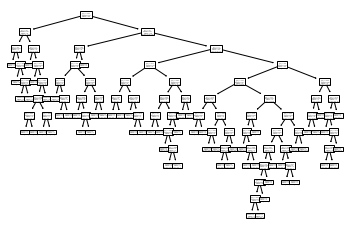

In [84]:
from sklearn import tree
tree.plot_tree(model);

# Pruning the decision tree

In [97]:

model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

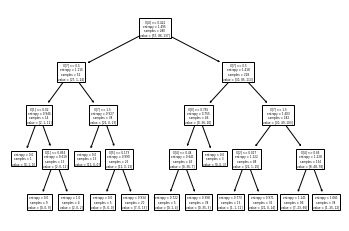

In [98]:
from sklearn import tree
tree.plot_tree(model1);

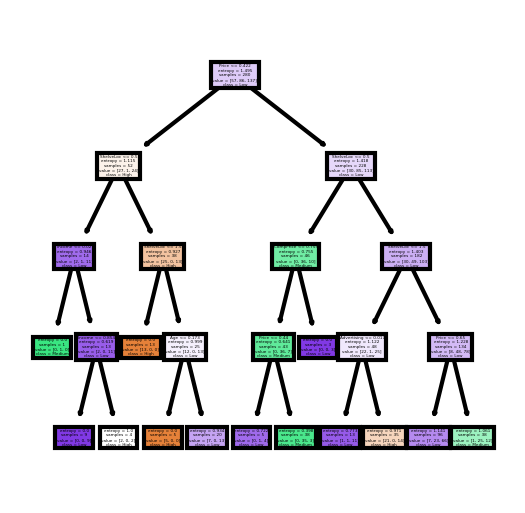

In [99]:
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc', 'Urban', 'US'] # fn =features name
cn = ['High','Medium','Low'] # class name
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2), dpi = 300)
tree.plot_tree(model1 , feature_names = fn , class_names = cn ,filled = True);

In [100]:
pred = model1.predict(x_test)
pred

array([1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 2, 0])

In [101]:
pd.Series(pred).value_counts()

2    68
1    35
0    17
dtype: int64

In [102]:
# Checking accuracy of model
model1.score(x_test, y_test)

0.6083333333333333

# CART Method

# Building Decision Tree Classifier using Gini Impurity

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_gini = DecisionTreeClassifier(criterion = 'gini' ,max_depth = 3)
model_gini.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

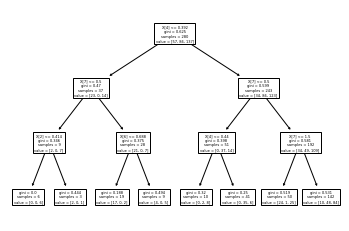

In [69]:
from sklearn import tree
tree.plot_tree(model_gini);

In [70]:
pred1 = model_gini.predict(x_test)

In [71]:
pred1

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2])

In [72]:
pd.Series(pred1).value_counts()

2    88
1    28
0     4
dtype: int64

In [73]:
# accuracy
model_gini.score(x_test,y_test)

0.5416666666666666

In [74]:
np.mean(pred1==y_test)

0.5416666666666666